(300, 3)
(300,)
iteration 0: loss 1.096919
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300

(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)
(300,)
(300, 3)

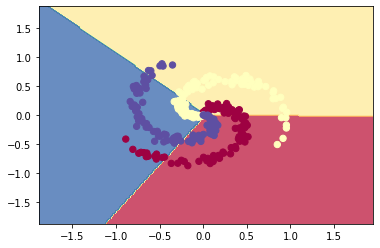

In [6]:
#Train a Linear Classifier
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(0)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D))
y = np.zeros(N*K, dtype='uint8')
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j



W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in range(1000):
  #print X.shape
  # evaluate class scores, [N x K]
  scores = np.dot(X, W) + b   #x:300*2 scores:300*3
  #print scores.shape 
  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K] probs:300*3
  print (probs.shape) 
  # compute the loss: average cross-entropy loss and regularization
  corect_logprobs = -np.log(probs[range(num_examples),y]) #corect_logprobs:300*1
  print (corect_logprobs.shape)
  data_loss = np.sum(corect_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W)
  loss = data_loss + reg_loss
  if i % 100 == 0:
    print ("iteration %d: loss %f" % (i, loss))
  
  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples
  
  # backpropate the gradient to the parameters (W,b)
  dW = np.dot(X.T, dscores)
  db = np.sum(dscores, axis=0, keepdims=True)
  
  dW += reg*W # regularization gradient
  
  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db
  scores = np.dot(X, W) + b
predicted_class = np.argmax(scores, axis=1)
print ('training accuracy: %.2f' % (np.mean(predicted_class == y)))

h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

